### Сборный проект
 
Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения.

Цель проекта:
- Научиться правильным методам расчета статистической значимость;
- Научиться запускать А/В-тест;
- Научиться делать выводы на основании результатов А/В-теста.

### План работ по проекту:
1. Подготовка всех необходимых библиотек, открытие файла  и знакоство с данными;
2. [Подготовка данных:](#step_1)
3. Изучение и проверка данных:
   - Работа со всеми данными датосета:
       - [Сколько всего событий в логе?](#step_2);
       - [Сколько всего пользователей в логе?](#step_2);
       - [Сколько в среднем событий приходится на пользователя?](#step_2);
       - [Данными за какой период вы располагаете?  Найдите максимальную и минимальную дату.](#step_2);
       - [Построим гистограмму по дате и времени](#step_3);
   - Работа с очищенными данными: 
       - [Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. ](#step_4);
       - [Проверим много ли событий и пользователей мы потеряли, отбросив старые данные.](#step_5);
       - [Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.](#step_5);
4. Изучим воронку событий:
    - [Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.](#step_6);
    - [Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.](#step_6);
    - [Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку?](#step_7);
    - [На каком шаге теряете больше всего пользователей?](#step_9);       
5. Изучим результаты эксперимента:
    - [Сколько пользователей в каждой экспериментальной группе?](#step_10);
    - [Проверим, находят ли статистические критерии разницу между выборками 246 и 247.](#step_11);       
    - [Аналогично поступим группой с изменённым шрифтом.Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой](#step_12);
6. [Общий вывод](#step_13)

### Шаг 1. Подготовка всех необходимых библиотек, открытие файла  и знакоство с данными

In [1]:
# импортирование библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
import warnings
import scipy.stats as st
import math as mth
import re
from pylab import rcParams
from plotly import graph_objects as go
pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')

plt.rc('axes', axisbelow=True) 
rcParams['figure.figsize'] = 16, 9
from scipy import stats as st



In [2]:
# ознакомление с датосетом

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [3]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


##### Вывод 
- Необходимо проверить данные на дубликаты
- Отфоматировать дату
- Проверить данные на пропуски
- Отформатировать название столбцов

<a id='step_1'></a>

### Шаг 2. Подготовка данных

##### Заменим названия столбцов на удобные для нас

In [4]:
# изменеие названия столбцов

In [5]:
df_log.head()

,event_name,device_id,event_time_f,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


##### Проверим данные на дубликаты

In [6]:
# проверка на дубликаты

413

In [7]:
# удалим дубликаты

,event_name,device_id,event_time_f,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,1565212345,247
243709,MainScreenAppear,5849806612437486590,1565212439,246
243710,MainScreenAppear,5746969938801999050,1565212483,246
243711,MainScreenAppear,5746969938801999050,1565212498,246


##### Проверим данные на пропуски

In [8]:
# проверка на пропуски

False

##### Приведем дату к нужному формату

In [9]:
# изменение формата

,event_name,device_id,event_time_f,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247
243709,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246
243710,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246
243711,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246


##### Добавим столбец даты и времени

In [10]:
# добавление колонок с датой

,event_name,device_id,event_time_f,exp_id,event_date,event_time
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11:48:42
...,...,...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,21:12:25
243709,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,21:13:59
243710,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,21:14:43
243711,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,21:14:58


### Шаг 3. Изучение и проверка данных

<a id='step_2'></a>

##### Сколько всего событий в логе?

In [11]:
# посчитаем кол-во событий в логах

243713

##### Сколько всего пользователей в логе?

In [12]:
# посчитаем кол-во пользователей в логах


7551

##### Сколько в среднем событий приходится на пользователя?

In [13]:
# посчитаем среднее кол-во событий на 1 пользоателя 

32.0

##### Данными за какой период вы располагаете?  Найдите максимальную и минимальную дату.

In [14]:
# начало периода

Timestamp('2019-07-25 04:43:36')

In [15]:
# конец периода

Timestamp('2019-08-07 21:15:17')

<a id='step_3'></a>

##### Построим гистограмму по дате и времени

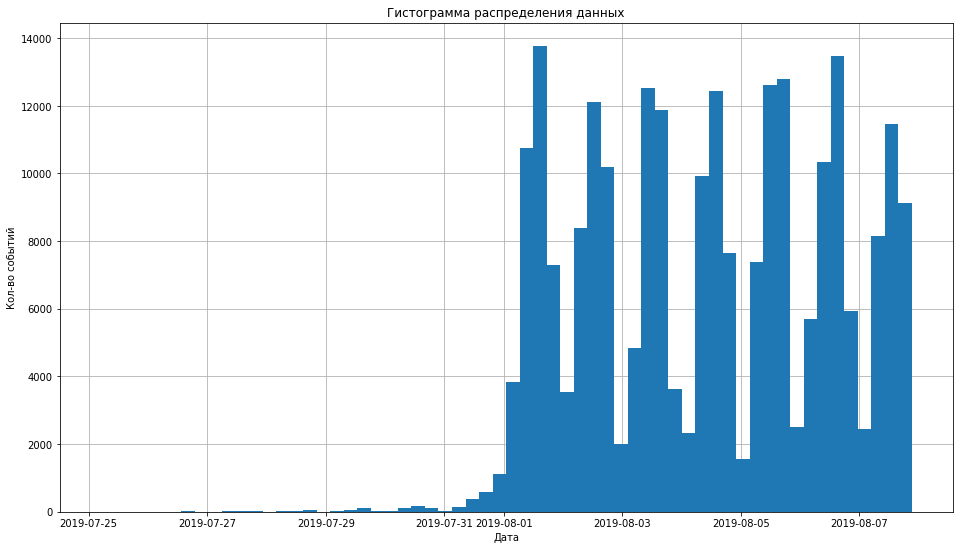

In [16]:
# построение графика

- Рассмотрев гистограмму можно сказать, что нам нужны данные начиная от 2019-08-01. От этого момента начинается основной поток данных

<a id='step_4'></a>

##### Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. 

In [17]:
# создадим таблицу отбросив значения не входящие в дату 2019-08-01

,event_name,device_id,event_time_f,exp_id,event_date,event_time
0,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01,00:07:28
1,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01,00:08:00
2,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01,00:08:55
3,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01,00:08:58
4,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01,00:08:59
...,...,...,...,...,...,...
240882,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,21:12:25
240883,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,21:13:59
240884,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,21:14:43
240885,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,21:14:58


<a id='step_5'></a>

##### Данными за какой период времени мы располагаем на самом деле.

- После устронения лишних данных мы распологаем данными от 2019-08-01 до 2019-08-07

##### Проверим много ли событий и пользователей мы потеряли, отбросив старые данные.

In [18]:
# проверка данных

Отбросив старые данные мы потеряли 2826 строк это 1.16 % от всех данных
Отбросив старые данные мы потеряли 17 пользователей это 0.23% от всех пользователей


##### Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.

In [19]:
# проверка 

,exp_id,number_of_users
0,246,2484
1,247,2513
2,248,2537


<a id='step_6'></a>

### Шаг 4. Изучаем воронку событий

##### Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.

In [20]:
# число событий 

,event_name,count
0,MainScreenAppear,117328
1,OffersScreenAppear,46333
2,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


##### Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.

In [21]:
# посчитаем, сколько пользователей совершали каждое из этих событий.

# поститаем долю пользователей совершивших какое-либо из событий

,event_name,number_device_id,percent
0,MainScreenAppear,7419,36.86
1,OffersScreenAppear,4593,22.82
2,CartScreenAppear,3734,18.55
3,PaymentScreenSuccessful,3539,17.59
4,Tutorial,840,4.17


<a id='step_7'></a>

##### Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? 

##### Порядок в котором возможно происходят события:
    1. MainScreenAppear;	
    2. OffersScreenAppear;
    3. CartScreenAppear;
    4. Payment Screen Successful.

    Событие "Tutorial" может быть открыто на любом этапе логов. Считаю возможным не учитывать это событие в выстроение последовательной цепочки.

<a id='step_9'></a>

##### На каком шаге теряете больше всего пользователей?

In [23]:
# вычисление потерь пользователей на этапах 

- Больше всего пользователей теряется на переходе от "MainScreenAppear" к  "OffersScreenAppear"мы теряем 2826 или 38.09 % 


##### Какая доля пользователей доходит от первого события до оплаты?

In [24]:
# вычисление кол ва пользователей

- 47.7 % пользователей доходит от первого события до оплаты.


<a id='step_10'></a>

### Шаг 5. Изучим результаты эксперимента

##### Сколько пользователей в каждой экспериментальной группе?

In [25]:
# воспользуемся таблицей из пункта выше

,exp_id,number_of_users
0,246,2484
1,247,2513
2,248,2537


<a id='step_11'></a>

##### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247.

##### Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

In [26]:
# выделяем  первую группу для А/А теста из общего датофрейма


In [27]:
# выделяем  вторую  группу для А/А теста из общего датофрейма


In [28]:
# создаем датофрейм кол-ва событий в группе 246

# убтраем собитие Tutorial оно не выстраивается в последовательную цепочку событий


,event_name,number_device_id
0,MainScreenAppear,2450
1,OffersScreenAppear,1542
2,CartScreenAppear,1266
3,PaymentScreenSuccessful,1200


In [29]:
# создаем датофрейм кол-ва событий в группе 247

# убтраем собитие Tutorial оно не выстраивается в последовательную цепочку событий


,event_name,number_device_id
0,MainScreenAppear,2476
1,OffersScreenAppear,1520
2,CartScreenAppear,1238
3,PaymentScreenSuccessful,1158


##### Нулевая гипотеза: 
- Cтатистически значимых различий между выборками 246 и 247, нет. Уровень значимости alpha = 0.05/16;

##### Альтернативная гипотеза:
- Cтатистически значимые различия между выборками 246 и 247, есть. Уровень значимости alpha = 0.05/16.

In [30]:
# создаем функцию для подсчета z-теста 
# за значение "users_1" "users_2" берем кол-во укникальных пользователей
# k- поправка Бонферрони 

    # пропорция успехов во второй группе:
    
    # пропорция успехов в комбинированном датасете:
    
    # разница пропорций в датасетах
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)


In [31]:
# создаем создаем цикл для осуществления подсчета по функции 
# т.к. мы знаем, что кол-во событий во всех выборках одинаковое  "range" вычисляем по таблице "event_num_246"


p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


##### Вывод 
- Разница между контрольными группами меньше 1%, общих пользователей в группах  нет. Гипотиза о равенстве долей подтверждена.Это дает нам уверенность о точности проведения тестирования без искажения результатов.

<a id='step_12'></a>

##### Аналогично поступим группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

In [32]:
# выделяем группу 248(В) для теста из общего датофрейма


In [33]:
# создаем датофрейм кол-ва событий в группе 248

# убтраем собитие Tutorial оно не выстраивается в последовательную цепочку событий


,event_name,number_device_id
0,MainScreenAppear,2493
1,OffersScreenAppear,1531
2,CartScreenAppear,1230
3,PaymentScreenSuccessful,1181


##### Нулевая гипотеза: 
- Cтатистически значимых различий между выборками 246 и 248, нет. Уровень значимости alpha = 0.05/16;

##### Альтернативная гипотеза:
- Cтатистически значимые различия между выборками 246 и 248, есть. Уровень значимости alpha = 0.05/16.

In [34]:
# используем цикл 
# для сравнения результата между группой 248(группа с измененным шрифтом)с первой контрольной группой 246


p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


##### Нулевая гипотеза: 
- Cтатистически значимых различий между выборками 247 и 248, нет. Уровень значимости alpha = 0.05/16;

##### Альтернативная гипотеза:
- Cтатистически значимые различия между выборками 247 и 248, есть. Уровень значимости alpha = 0.05/16.

In [35]:
# используем цикл  
# для сравнения результата между группой 248(группа с измененным шрифтом) со второй контрольной группой 247

p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [36]:
# обьеденим группы 246 и 247

In [37]:
# создаем датофрейм кол-ва событий в группе A

# убтраем собитие Tutorial оно не выстраивается в последовательную цепочку событий

,event_name,number_device_id
0,MainScreenAppear,4926
1,OffersScreenAppear,3062
2,CartScreenAppear,2504
3,PaymentScreenSuccessful,2358


##### Нулевая гипотеза: 
- Cтатистически значимых различий между объедененной выборкой 246,247 и 248, нет. Уровень значимости alpha = 0.05/16;

##### Альтернативная гипотеза:
- Cтатистически значимые различия между объедененной выборкой 246,247 и 248, есть. Уровень значимости alpha = 0.05/16.

In [38]:
# используем цикл 
# для сравнения результата между группой 248(группа с измененным шрифтом) с объедененной группой А 

p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


##### Вывод 
- во всех тестах мы увидели что нет основания считать доли разными 

##### Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

- уровень значимости выбранный мной = 0.05/16;
- кол-во проверок статистических гипотез 16;
- уровень значимости который стоит принимать при учете поравки Бонферрони - 0.05/16

<a id='step_13'></a>

### Вывод 
- Мы очистили данные, обработав их необходимым образом, провели А/А/В тест и  результатам 7 дневного теста мы выяснили, что изменение шрифта не сильно повлияет на действия пользователей мобильного приложения. И не сильно отразиться на их покупательской способности. 
